In [1]:
import processing as pr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from filters.denoise import *
from implementations.richardson_lucy import RihardsonLucy
from implementations.MAP import MAP
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf

from algorithms.test_algorithm import TestAlgorithm
from algorithms.test2_algorithm import TestAlgorithm2
from algorithms.test3_algorithm import TestAlgorithm3

import cv2 as cv
import numpy as np

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tmp = pr.Processing('images','blured','restored')
# tmp.read_one('3096.png')
# tmp.read_one('im1.png')
# tmp.read_one('fly.jpg')
# tmp.load_bind_state('images_dataset\\dataset_bind.json')

In [3]:
fl1 = GaussianNoise(5)    #фильтры для разных шумов и смазов (см. абстрактный класс filter.FILTER_BASE)
fl2 = PoissonNoise(0.01)
fl4 = SaltAndPepperNoise([1,1,1000])
fl8 = DefocusBlur(gaussian_distribution, param=2,kernel_size = 15)
# fl9 = MotionBlur(gaussian_distribution, param=10.0,angle=100,kernel_length=11)
fl9 = MotionBlur(gaussian_distribution, param=10.0,angle=45,kernel_length=15)

shape_points = np.column_stack([[-1.0,2.0,0.0,-1.0,3.0],[0.0,2.0,-1.0,-1.5,1.5]])
intensity_points = np.column_stack([[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],[0.0,0.9,0.1,0.3,0.7,0.7,0.1,0.0,0.2,0.35,0.0]])
fl10 = BSpline_blur(shape_points=shape_points,intensity_points=intensity_points,shape_degree=2,intensity_degree=3,output_size=(15,15))

fl11 = OldPhotoNoise()
fl12 = ColoredNoise(noise_level=0.2,beta=1)
fl13 = ColoredNoise(noise_level=0.2,beta=2)

fl14 = Pink_Noise(noise_level=0.02)
fl15 = Brown_Noise(noise_level=0.05)


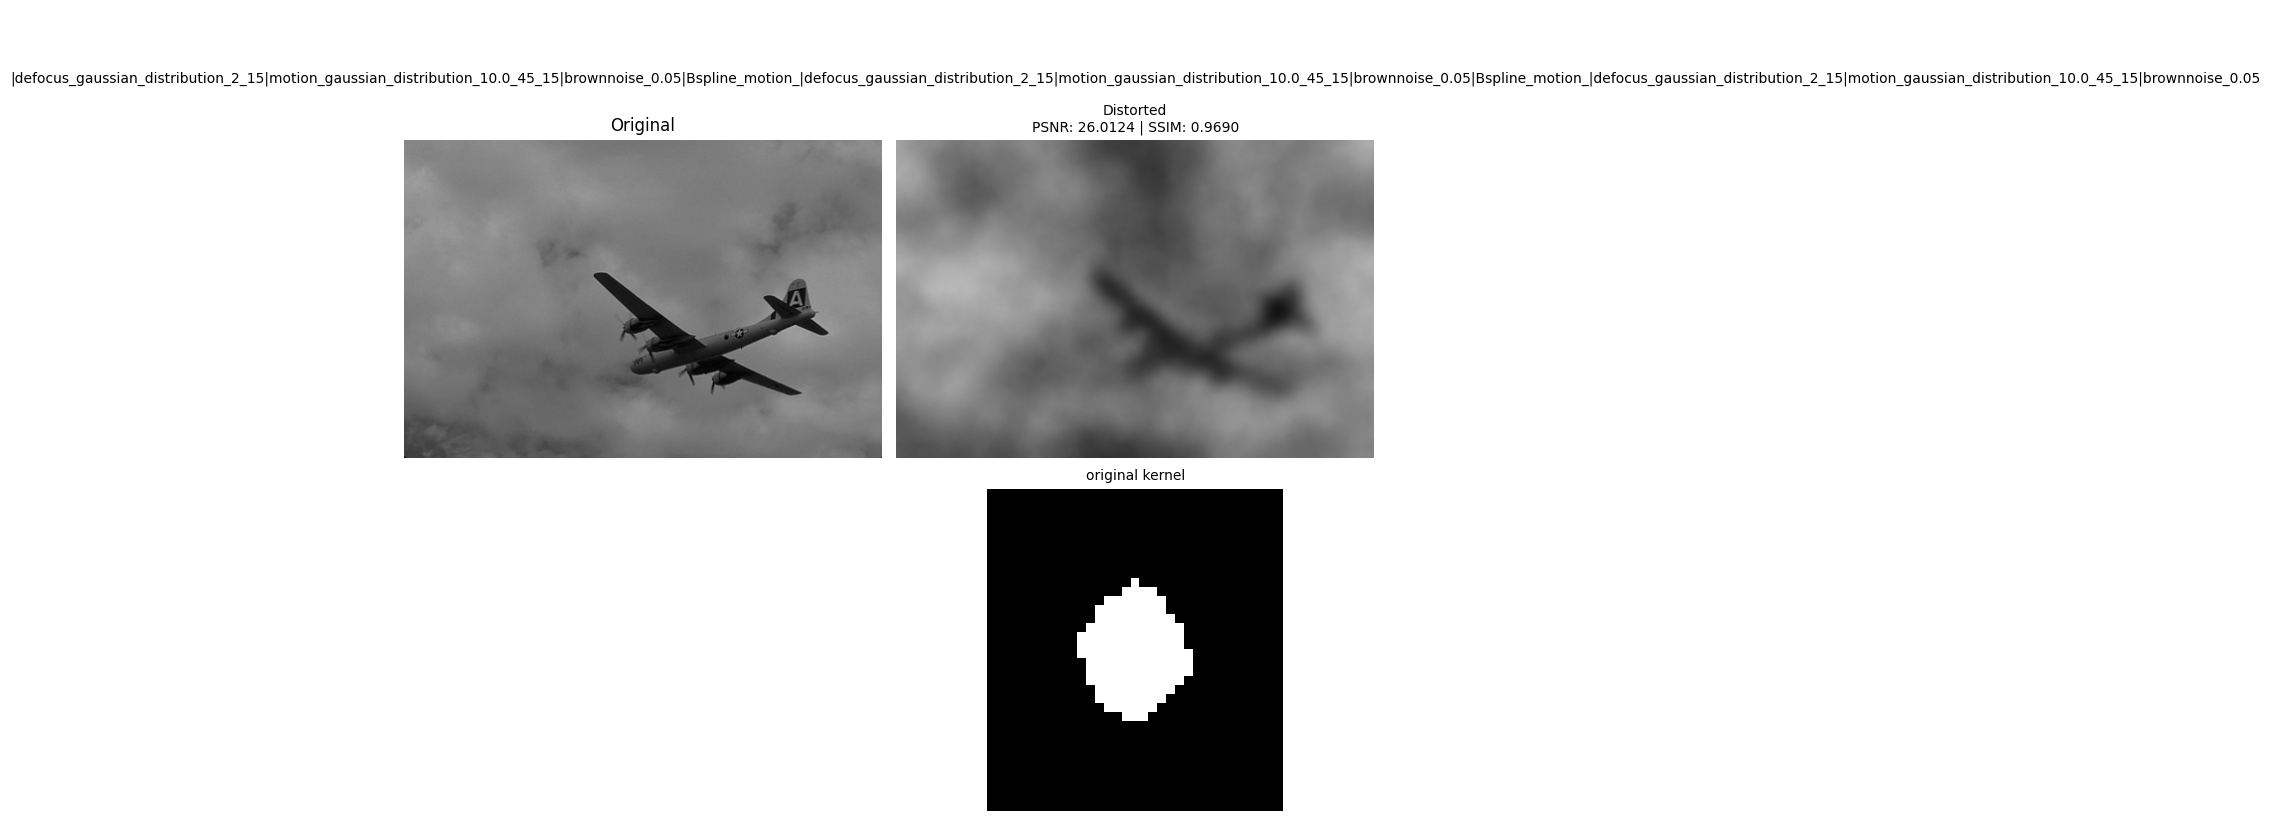

In [6]:

tmp.filter(fl10)
tmp.filter(fl8)
# # tmp.save_filter()
# tmp.filter(fl1)

tmp.filter(fl9)
tmp.filter(fl15)


# tmp.filter(fl4)


# tmp.histogram_equalization(view_histogram=True)
tmp.show()

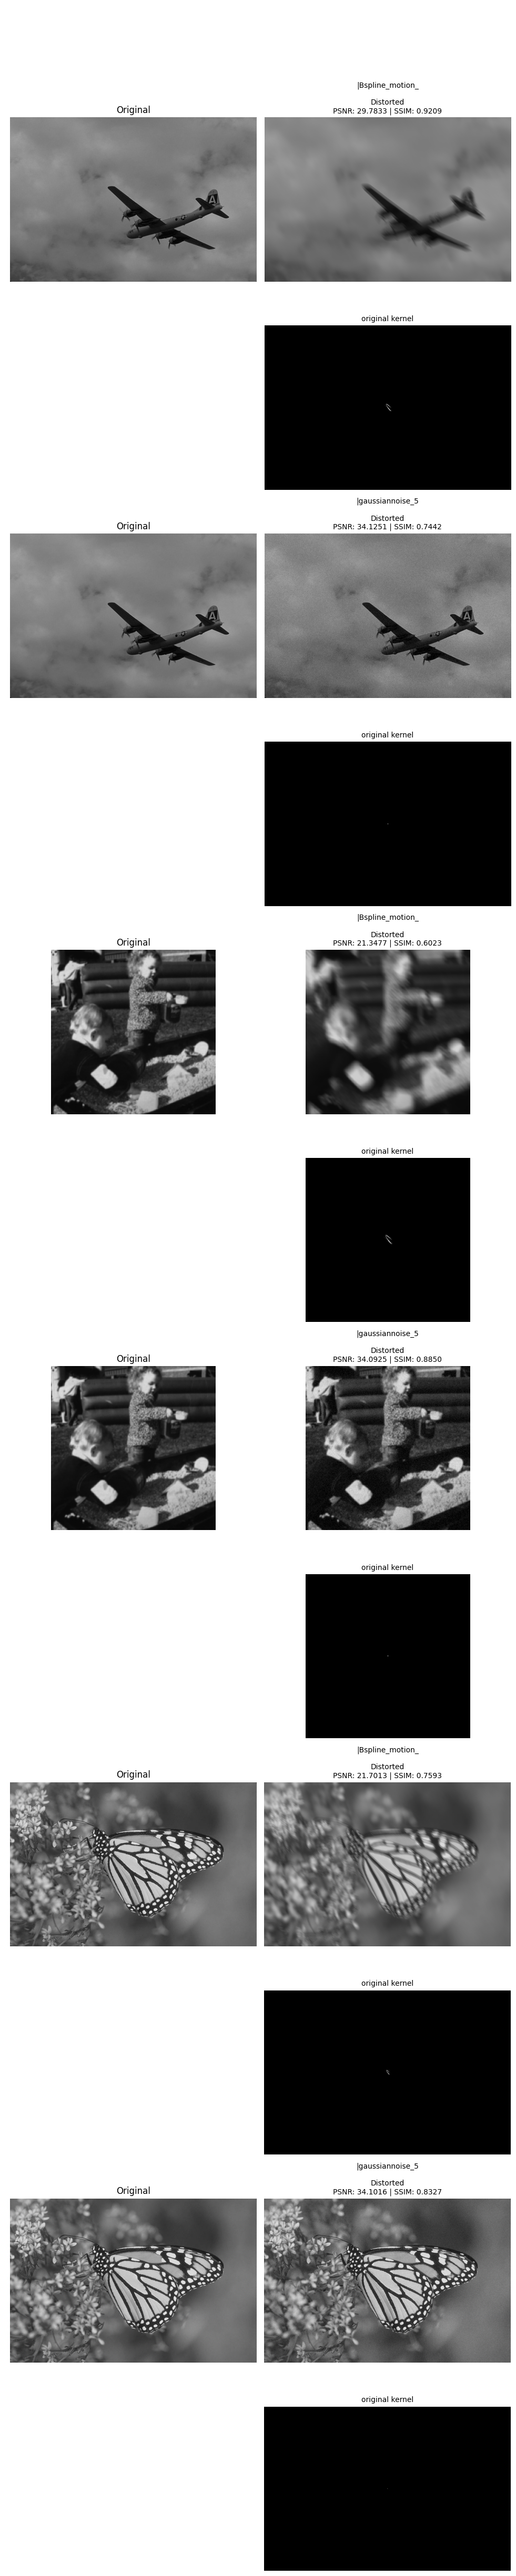

In [ ]:
# tmp.show(kernel_intencity_scale=1, kernel_size=0.25)
# tmp.show()

In [7]:
tmp.save_bind_state('dataset\\tmp.json')

In [6]:
arr = [0,1,2]
print(np.sum(arr[0:5]))

3


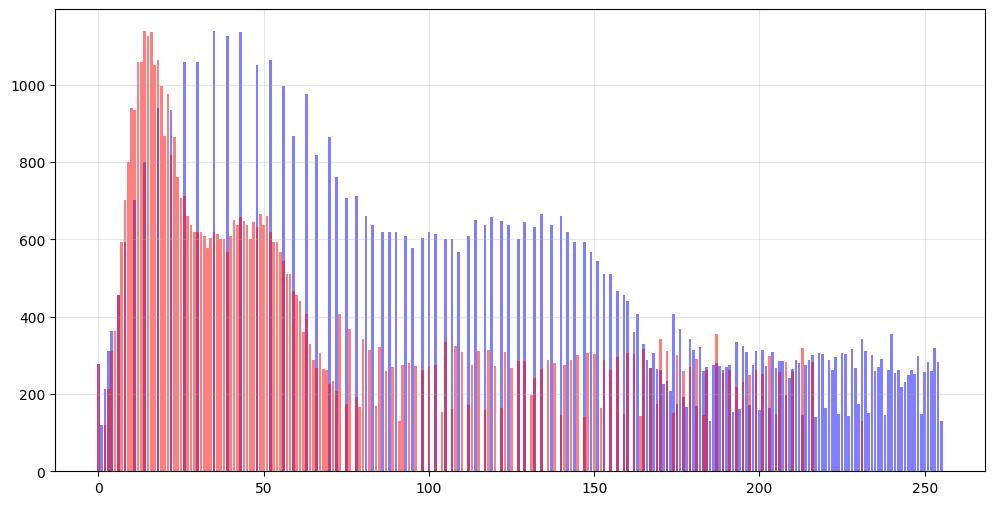

d:\for_proga\franework_deconvolution\framework (9)\metrics.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  return peak_signal_noise_ratio(original, restored)
d:\for_proga\franework_deconvolution\framework (9)\metrics.py:31: UserWarning: Inputs have mismatched dtypes. Setting data_range based on im1.dtype.
  return structural_similarity(original, restored)


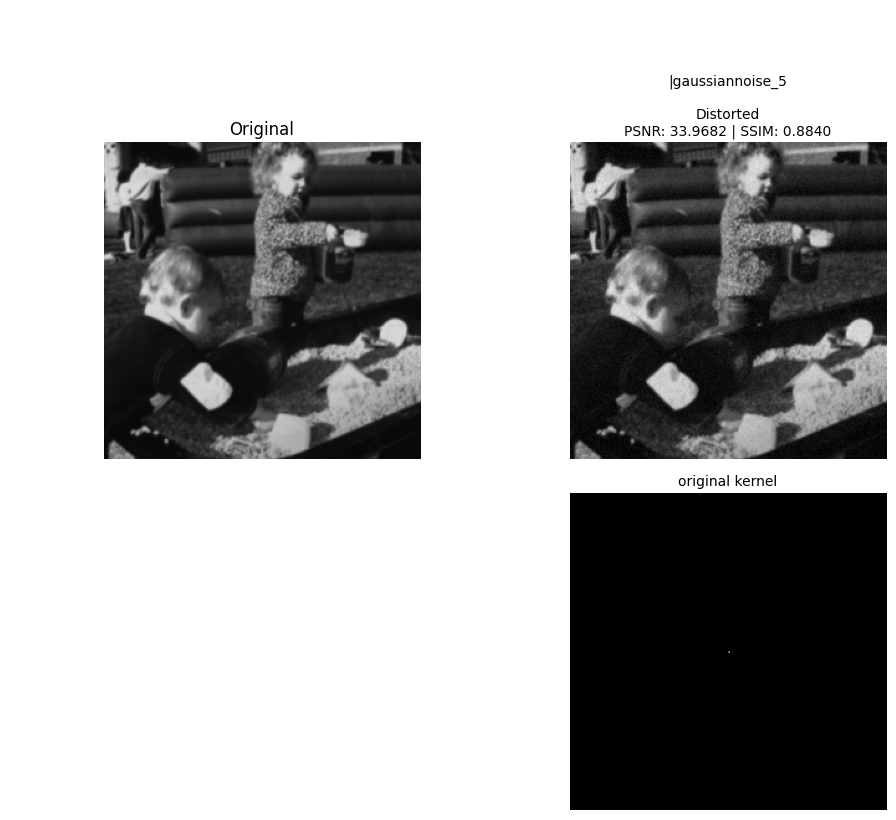

In [5]:
tmp.inverse_histogram_equalization(view_histogram=True)
tmp.show()

In [5]:
# from algorithms.adamalavi_Blind_motion_deblurring_for_license_plates import AdamalaviBlindMotionDeblurringForLicensePlates
# alg_AdamalaviBlindMotionDeblurringForLicensePlates = AdamalaviBlindMotionDeblurringForLicensePlates()
# param_ranges = {
#     'angle_model_path': (None,None),
#     'length_model_path': (None,None),
#     'noise':  (0.01, 1.0),
#     'psf_size':(10,300),
#     'inference_size': ((640, 480),(640, 480)),
#     'fft_size': ((224, 224),(224, 224)),
#     'angle_top_k': (1,20)
# } 
# tmp.process_hyperparameter_optimization(
#     algorithm_processor=alg_AdamalaviBlindMotionDeblurringForLicensePlates, 
#     param_ranges=param_ranges, 
#     n_trials=1000,
#     timeout=3600,
#     logs=False
# )


# from algorithms.jtaoz_GKPILE_Deconvolution import JtaozGKPILEDeconvolution
# alg_JtaozGKPILEDeconvolution = JtaozGKPILEDeconvolution(kernel_size=31)
# tmp.process(alg_JtaozGKPILEDeconvolution)


# from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
# from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf
# predict_hqmbr = create_line_psf(np.pi, 1, (31, 31))
# alg_hqmbr = HQMBR(1,predict_psf= predict_hqmbr, MAX_ITER=5)
# param_ranges = {
#     'max_iter': (1, 50),      # от 1 до 5
#     'gamma': (0.01, 10.0),         # от 2 до 3
#     'lambda1': (0.01, 20.0),     # от 0.5 до 1
#     'k1': (0.01, 20.0),        # от 1.1 до 1.3
#     'lambda2': (1, 100),     # от 10 до 25
#     'k2': (0.01, 20.0),           # от 1.5 до 2
#     'angle': (0.0, np.pi),
#     'size': (5, 100)
# } 
# tmp.process_hyperparameter_optimization(
#     algorithm_processor=alg_hqmbr, 
#     param_ranges=param_ranges, 
#     n_trials=200,
#     timeout=3600,
#     logs=True
# )

In [6]:
# tmp.show(kernel_intencity_scale=10.0)
# tmp.unbind_restored()

In [ ]:
# tmp.histogram_equalization(view_histogram=True)

den1 = LinearSmoothing(3)
den2 = AnisotropicDiffusion(niter=20,kappa=10,gamma=0.25,option=2)
den3 = NonLocalMeans(fast=True, sigma_coef = 0.0025, patch_size=5, patch_distance=6)
den4 = MedianFilter(param=5)
den5 = Wavelet(method='BayesShrink',mode='soft',rescale_sigma=True)

# tmp.filter(den1)
# tmp.filter(den2)
# tmp.filter(den3)
# tmp.filter(den4)
# tmp.filter(den5)


tmp.show()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\for_proga\franework_deconvolution\framework (9)\algorithms\HQMotionBlurRestoration\convolve.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  p1 = (min(Y/np.tan(theta), X), min(X*np.tan(theta), Y))
d:\for_proga\franework_deconvolution\framework (9)\metrics.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  return peak_signal_noise_ratio(original, restored)


SSIM calculation error: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.
Restored: im1_14_HQMBR.png (PSNR: 17.08, SSIM: nan)


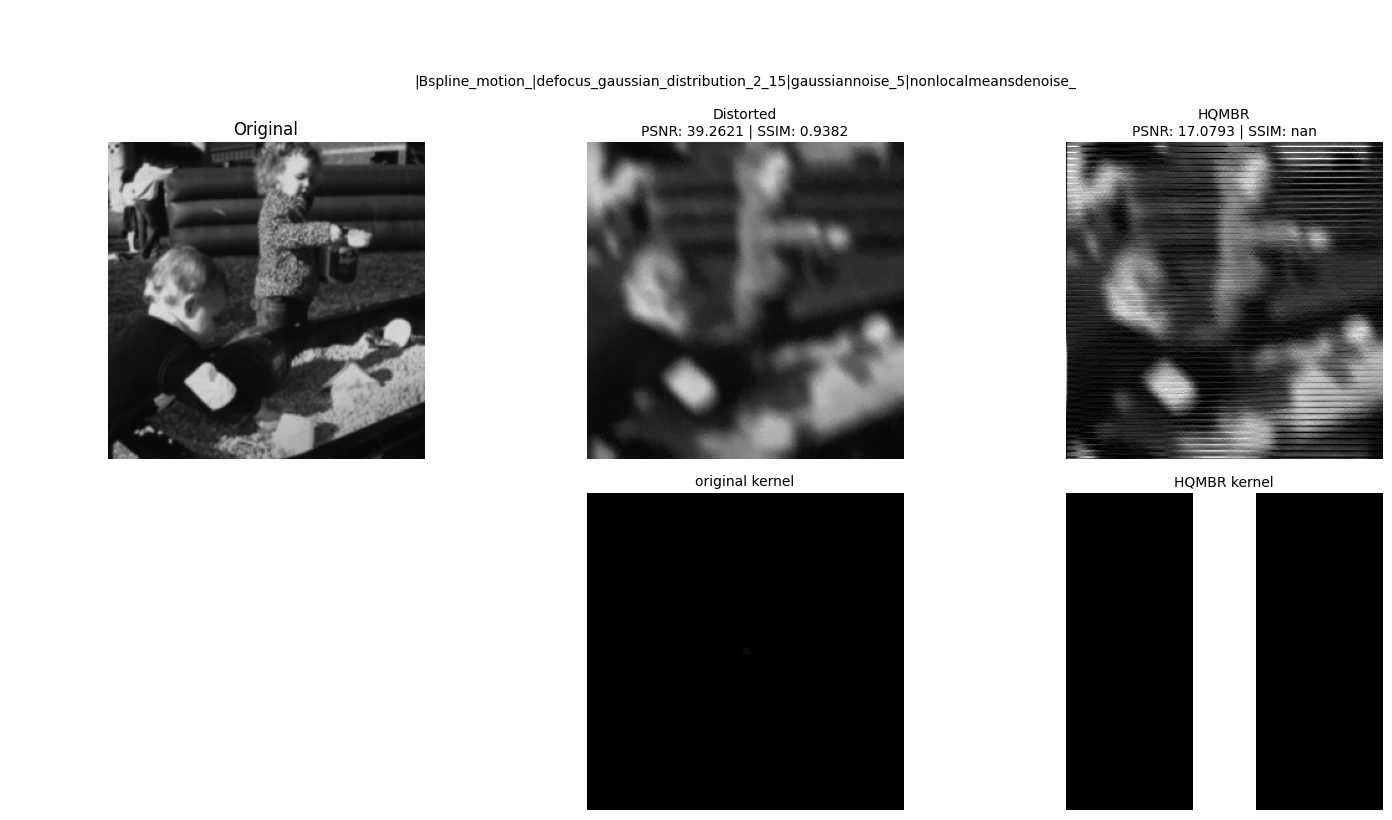

In [8]:
# tmp.histogram_equalization(view_histogram=True)
tmp.filter(den3)

from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf
predict_hqmbr = create_line_psf(np.pi, 1, (31, 31))
alg_hqmbr = HQMBR(1,predict_psf= predict_hqmbr, MAX_ITER=5)
# param_ranges = {
#     'max_iter': (1, 50),      # от 1 до 5
#     'gamma': (0.01, 10.0),         # от 2 до 3
#     'lambda1': (0.01, 20.0),     # от 0.5 до 1
#     'k1': (0.01, 20.0),        # от 1.1 до 1.3
#     'lambda2': (1, 100),     # от 10 до 25
#     'k2': (0.01, 20.0),           # от 1.5 до 2
#     'angle': (0.0, np.pi),
#     'size': (5, 100)
# } 
# tmp.process_hyperparameter_optimization(
#     algorithm_processor=alg_hqmbr, 
#     param_ranges=param_ranges, 
#     n_trials=200,
#     timeout=3600,
#     logs=True
# )

alg_hqmbr.import_param_from_file('parametrs\\HQMBR1.json')
tmp.process(alg_hqmbr)

# tmp.inverse_histogram_equalization(view_histogram=True)
tmp.show(kernel_intencity_scale=10.0)
tmp.unbind_restored()

In [9]:
# tmp.show(kernel_intencity_scale=10.0)
# tmp.unbind_restored()

In [10]:
# tmp.histogram_equalization(view_histogram=True)

In [11]:
# tmp.show()

In [12]:
# tmp.inverse_histogram_equalization(view_histogram=True)

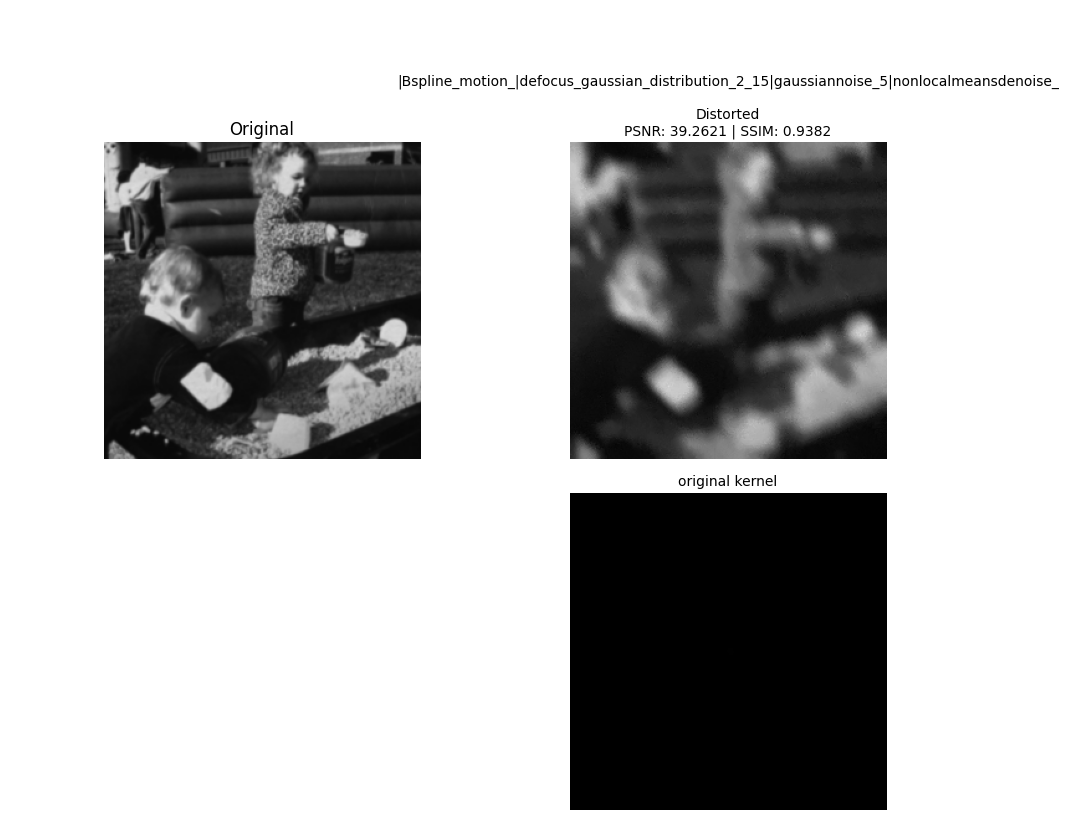

In [13]:
tmp.show()

In [14]:
# tmp.clear_output_directory()